<a href="https://colab.research.google.com/github/Kaiziferr/deep_learning/blob/master/multilayer_perceptron/07_workshop_learningrate_adaptative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.optimizers.schedules import ExponentialDecay
from keras.callbacks import LearningRateScheduler

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [163]:
url = 'https://raw.githubusercontent.com/Kaiziferr/datasets/main/diabetes.csv'
data = pd.read_csv(url)

# **Split data**
---



In [164]:
data_values = data.values

In [165]:
X = data_values[:,:8].astype('float')
y = data_values[:,8]

In [166]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.8,
    shuffle=True,
    random_state=1254
)

In [167]:
encoder = LabelEncoder()
y_train_encoder = encoder.fit_transform(y_train)
y_test_encoder = encoder.transform(y_test)

In [168]:
estimator_scaler = StandardScaler()
X_train_scaler = estimator_scaler.fit_transform(X_train)
X_test_scaler = estimator_scaler.transform(X_test)

In [169]:
def optimization_learning_curves(
    history:dict,
    metrica:str,
    title:str='',
    X_size:int=8,
    y_size:int=4,
    font_size:int=15,
    X_label:str='Epoch',
    y_label:str='Loss'
)->None:
  """ Grafica curvas de aprendizaje """
  fig, ax = plt.subplots(figsize=(X_size, y_size))
  fig.suptitle(title, fontsize=font_size)
  ax.plot(history.history[metrica])
  ax.plot(history.history[f'val_{metrica}'])
  ax.set_xlabel(X_label, size = 12)
  ax.set_ylabel(y_label, size = 12)
  ax.legend(['Train', 'Test'], loc = 'upper right', fontsize = 12)
  ax.tick_params(labelsize = 12)
  fig.show()

# **Optimizador Adaptativo Adam**

---



In [170]:
model = Sequential()
model.add(Dense(1, input_dim = 8, activation='relu', kernel_initializer = 'glorot_uniform'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform'))

In [171]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam'
)

history = model.fit(
    X_train_scaler,
    y_train_encoder,
    validation_data=(X_test_scaler, y_test_encoder),
    epochs=100,
    batch_size=10,
    verbose = 1
)

Epoch 1/100
62/62 [==============================] - 1s 8ms/step - loss: 0.8346 - val_loss: 0.7691
Epoch 2/100
62/62 [==============================] - 0s 5ms/step - loss: 0.8086 - val_loss: 0.7475
Epoch 3/100
62/62 [==============================] - 0s 4ms/step - loss: 0.7854 - val_loss: 0.7291
Epoch 4/100
62/62 [==============================] - 0s 4ms/step - loss: 0.7650 - val_loss: 0.7131
Epoch 5/100
62/62 [==============================] - 0s 4ms/step - loss: 0.7476 - val_loss: 0.6999
Epoch 6/100
62/62 [==============================] - 0s 4ms/step - loss: 0.7315 - val_loss: 0.6883
Epoch 7/100
62/62 [==============================] - 0s 3ms/step - loss: 0.7173 - val_loss: 0.6792
Epoch 8/100
62/62 [==============================] - 0s 3ms/step - loss: 0.7051 - val_loss: 0.6700
Epoch 9/100
62/62 [==============================] - 0s 3ms/step - loss: 0.6943 - val_loss: 0.6625
Epoch 10/100
62/62 [==============================] - 0s 2ms/step - loss: 0.6847 - val_loss: 0.6567
Epoch 11/

In [172]:
len(X_train_scaler)/10

61.4

122.8 lotes con 5 muestras

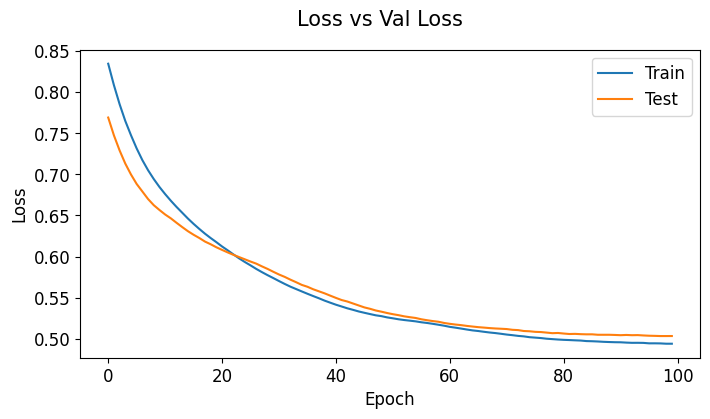

In [173]:
optimization_learning_curves(history, metrica='loss', title='Loss vs Val Loss')

- El modelo tiene una convergencia en la época 60
- El error se redujo a 0.49 aproximadamente en la época 62.

# **Planificación de learning rate en función del tiempo**

---



In [174]:
model2 = Sequential()
model2.add(Dense(1, input_dim=8, activation='relu', kernel_initializer='glorot_uniform'))
model2.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform'))

In [175]:
epoch = 100
lr = 0.01
decay_rate = lr/epoch
momentum = 0.8

In [176]:
lr_schedule = ExponentialDecay(
    initial_learning_rate=lr,
    decay_steps = 10000,
    decay_rate = decay_rate
)

In [177]:
sgd = SGD(learning_rate=lr_schedule, momentum=momentum, nesterov=False)

In [178]:
model2.compile(loss='binary_crossentropy', optimizer=sgd)

In [179]:
history2 = model2.fit(
    X_train_scaler,
    y_train_encoder,
    validation_data=(X_test_scaler, y_test_encoder),
    epochs = epoch,
    batch_size=10,
    verbose = 1
)

Epoch 1/100
62/62 [==============================] - 1s 7ms/step - loss: 0.6132 - val_loss: 0.5678
Epoch 2/100
62/62 [==============================] - 0s 4ms/step - loss: 0.5436 - val_loss: 0.5268
Epoch 3/100
62/62 [==============================] - 0s 4ms/step - loss: 0.5192 - val_loss: 0.5139
Epoch 4/100
62/62 [==============================] - 0s 4ms/step - loss: 0.5085 - val_loss: 0.5070
Epoch 5/100
62/62 [==============================] - 0s 2ms/step - loss: 0.5029 - val_loss: 0.5038
Epoch 6/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4998 - val_loss: 0.5012
Epoch 7/100
62/62 [==============================] - 0s 3ms/step - loss: 0.4980 - val_loss: 0.4997
Epoch 8/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4965 - val_loss: 0.4985
Epoch 9/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4956 - val_loss: 0.4975
Epoch 10/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4951 - val_loss: 0.4962
Epoch 11/

In [180]:
data.shape[0]/5

153.6

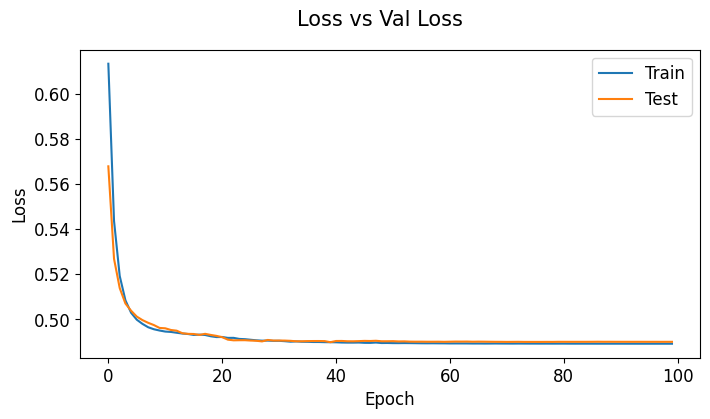

In [181]:
optimization_learning_curves(history2, metrica='loss', title='Loss vs Val Loss')

- El modelo tiene una convergencia en las primeras epocas.
- El error se redujo a 0.49 aproximadamente en la época 6, menor al modelo original.

# **Tasa de aprendizaje basado en caidas (drop)**

---



In [183]:
def step_decay(epochs):
  intial_rate = 0.01
  drop = 0.5
  epochs_drop = 10
  lrate = intial_rate * np.power(drop, np.floor(1+epochs) / epochs_drop)
  return lrate

In [184]:
model3 = Sequential()
model3.add(Dense(1, input_dim=8, activation='relu', kernel_initializer='glorot_uniform'))
model3.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform'))

In [185]:
sgd = SGD(learning_rate=0.0, momentum = 0.9)
model3.compile(loss = 'binary_crossentropy', optimizer=sgd)

In [188]:
lrate = LearningRateScheduler(step_decay)
callback_list = [lrate]

In [189]:
history3 = model3.fit(
    X_train_scaler,
    y_train_encoder,
    validation_data=(X_test_scaler, y_test_encoder),
    epochs=100,
    batch_size=5,
    callbacks=callback_list,
    verbose=1)

Epoch 1/100
123/123 [==============================] - 1s 4ms/step - loss: 0.6041 - val_loss: 0.5664 - lr: 0.0093
Epoch 2/100
123/123 [==============================] - 0s 2ms/step - loss: 0.5410 - val_loss: 0.5456 - lr: 0.0087
Epoch 3/100
123/123 [==============================] - 0s 2ms/step - loss: 0.5201 - val_loss: 0.5313 - lr: 0.0081
Epoch 4/100
123/123 [==============================] - 0s 2ms/step - loss: 0.5086 - val_loss: 0.5066 - lr: 0.0076
Epoch 5/100
123/123 [==============================] - 0s 3ms/step - loss: 0.4980 - val_loss: 0.4903 - lr: 0.0071
Epoch 6/100
123/123 [==============================] - 0s 2ms/step - loss: 0.4952 - val_loss: 0.4974 - lr: 0.0066
Epoch 7/100
123/123 [==============================] - 0s 2ms/step - loss: 0.4897 - val_loss: 0.4857 - lr: 0.0062
Epoch 8/100
123/123 [==============================] - 0s 2ms/step - loss: 0.4825 - val_loss: 0.4846 - lr: 0.0057
Epoch 9/100
123/123 [==============================] - 0s 2ms/step - loss: 0.4830 - val_

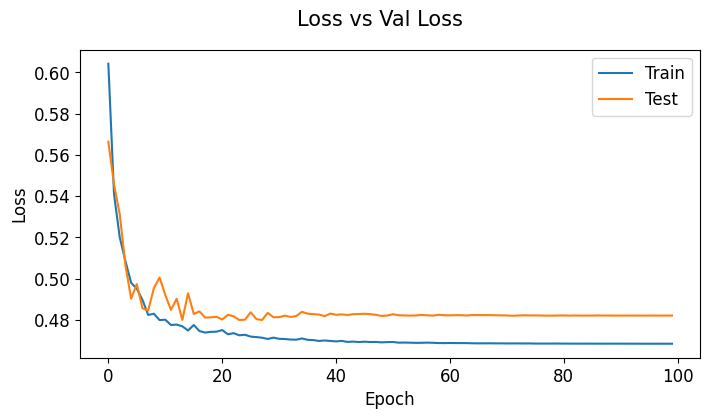

In [190]:
optimization_learning_curves(history3, metrica='loss', title='Loss vs Val Loss')

# **Notas**
---

- Incrementar la tasa de aprendizaje inicial, debido a que la tasa de aprendizaje disminuira, inicie con un valor mayor desde el cual disminuir

- Utilizar un gran momentum

- Experimente con diferentes planificacion

# **Concluciones**
---

- Se aprecia que en el método adam la reducción del error de entrenamiento se reduce a la par, que el error de validación.
- En el segundo y tercer método el error de entrenamiento se reduce más rápido que el de validación, con diferentes combinaciones de hiperparametros.

- Existe un overfiting. En el primer es menor en comparación a los ultmos metrodos

- Hay que investigar si el sobreaprendizaje del método de caídas drop y la planificación de learning rate en función del tiempo tiene relación con la reducción rápida del entrenamiento. Cabe resaltar que hay otros consideraciones a tener en cuenta, como el conjunto de datos, los hiperparametros entre otros. Con el adam es más estable el proceso, pero también se presenta overfiting, pero eso puede pasar por diversas razones.